<a href="https://colab.research.google.com/github/justinballas/Articles/blob/main/Excel_Python_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programming is becoming more and more popular in business analytics and is a great supplement or even alternative to excel. However, many excel users do not see the upside of learning to code. I often hear things like "I'm just so used to Excel" or "I'm visual, I like to see what I'm doing".

Fortunately, these are not issues for python users, and in fact, having an understanding of excel can give you a head start when learning to code.

Many of the concepts that Excel uses come from programming, and there have been many features included in python packages that were made for people that are used to Excel.

Here are a few popular Excel functions and features that can be easily done in Python.

1. Spreadsheets

Using spreadsheets is easy in python by using open source packages like "Pandas", let's see how it's done by importing pandas and its functions to load a CSV.

In [ ]:
#importing pandas as the alias pd
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

#creating the dataframe "df" object from the csv file
df = pd.read_excel('Financial Sample.xlsx',index_col=0)

#displaying the dataframe
df.head()

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date
SaleID,,,,,,,
1,Government,Canada,Carretera,1618.5,10,20,2014-01-01
2,Government,Germany,Carretera,1321.0,10,20,2014-01-01
3,Midmarket,France,Carretera,2178.0,10,15,2014-06-01
4,Midmarket,Germany,Carretera,888.0,10,15,2014-06-01
5,Midmarket,Mexico,Carretera,2470.0,10,15,2014-06-01


2. Working with columns

In python you can easily create calculated columns. My favorite way to do this is to utilize the lambda function. the lambda function allows you to quickly turn your dataframe into a variable (in this case x) so it can easily be used in a function. We will use lambda to add a few new columns to work with.



1.   COGS (Units Sold * Manufacturing price)
2.   Gross Profit (Units Sold * Share Price)
3.   Net Income (Gross Profit - COGS)
4.   Net Income Less Discounts (Net Income - Discounts)



In [ ]:
df['COGS'] = df.apply(lambda x: x['Units Sold'] * x['Manufacturing Price'],axis=1)

df['Gross Profit'] = df.apply(lambda x: x['Units Sold'] * x['Sale Price'], axis=1)

df['Net Income'] = df.apply(lambda x: x['Gross Profit'] - x['COGS'], axis=1)

df.head()

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Date,COGS,Gross Profit,Net Income
SaleID,,,,,,,,,,,
1,Government,Canada,Carretera,1618.5,10,20,32370.0,2014-01-01,16185.0,32370.0,16185.0
2,Government,Germany,Carretera,1321.0,10,20,26420.0,2014-01-01,13210.0,26420.0,13210.0
3,Midmarket,France,Carretera,2178.0,10,15,32670.0,2014-06-01,21780.0,32670.0,10890.0
4,Midmarket,Germany,Carretera,888.0,10,15,13320.0,2014-06-01,8880.0,13320.0,4440.0
5,Midmarket,Mexico,Carretera,2470.0,10,15,37050.0,2014-06-01,24700.0,37050.0,12350.0


Python also has a datetime module that takes the place of excel functions like Year(), Month(), Today() and Yearfrac(). let's use the datetime module to create a month column from the date column,

In [ ]:
df['Month'] = df['Date'].apply(lambda x: dt.datetime.strftime(x, '%B'))

To get something similar to Yearfrac() we can use the dateutil library to call the relativedelta function on our dataframe

In [ ]:
df['Years Since Sale'] = df['Date'].apply(lambda x: relativedelta(dt.datetime.today(), x).years)

let's take a look at what we did

In [ ]:
df.head(5)

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Date,COGS,Gross Profit,Net Income,Month,Years Since Sale
SaleID,,,,,,,,,,,,,
1,Government,Canada,Carretera,1618.5,10,20,32370.0,2014-01-01,16185.0,32370.0,16185.0,January,7
2,Government,Germany,Carretera,1321.0,10,20,26420.0,2014-01-01,13210.0,26420.0,13210.0,January,7
3,Midmarket,France,Carretera,2178.0,10,15,32670.0,2014-06-01,21780.0,32670.0,10890.0,June,6
4,Midmarket,Germany,Carretera,888.0,10,15,13320.0,2014-06-01,8880.0,13320.0,4440.0,June,6
5,Midmarket,Mexico,Carretera,2470.0,10,15,37050.0,2014-06-01,24700.0,37050.0,12350.0,June,6


Formatting

2. Sort and Filter

Let's sort the data by the "Total" column in ascending order

In [ ]:
#Using the pandas sort_values function with the column name that we want to sort as the argument.
#The default order is ascending, if you want descending order, specify the argument "ascending=False"
#Using the inplace argument to make the change permanent

df.sort_values(by='Net Income', ascending=False ,inplace=True)

#displaying the dataframe
df

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Date,COGS,Gross Profit,Net Income,Month,Years Since Sale
SaleID,,,,,,,,,,,,,
193,Government,United States of America,Paseo,3450.0,260,350,1207500.0,2014-07-01,897000.0,1207500.0,310500.0,July,6
141,Government,Germany,Amarilla,2966.0,260,350,1038100.0,2013-10-01,771160.0,1038100.0,266940.0,October,7
125,Government,Germany,Velo,2966.0,260,350,1038100.0,2013-10-01,771160.0,1038100.0,266940.0,October,7
134,Government,Germany,VTT,2877.0,260,350,1006950.0,2014-10-01,748020.0,1006950.0,258930.0,October,6
126,Government,Germany,Velo,2877.0,260,350,1006950.0,2014-10-01,748020.0,1006950.0,258930.0,October,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Government,Germany,VTT,280.0,5,7,1960.0,2014-12-01,1400.0,1960.0,560.0,December,6
616,Government,Germany,Carretera,280.0,5,7,1960.0,2014-12-01,1400.0,1960.0,560.0,December,6
279,Government,United States of America,Carretera,263.0,5,7,1841.0,2013-11-01,1315.0,1841.0,526.0,November,7


Now let's filter for only the Amarilla product using a logical filter on the dataframe



In [ ]:
filt = df['Product'] == 'Amarilla'

df[filt]

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Date,COGS,Gross Profit,Net Income,Month,Years Since Sale
SaleID,,,,,,,,,,,,,
141,Government,Germany,Amarilla,2966.0,260,350,1038100.0,2013-10-01,771160.0,1038100.0,266940.0,October,7
354,Government,France,Amarilla,2876.0,260,350,1006600.0,2014-09-01,747760.0,1006600.0,258840.0,September,6
46,Government,France,Amarilla,2750.0,260,350,962500.0,2014-02-01,715000.0,962500.0,247500.0,February,7
487,Government,Canada,Amarilla,2240.0,260,350,784000.0,2014-02-01,582400.0,784000.0,201600.0,February,7
304,Government,France,Amarilla,2076.0,260,350,726600.0,2013-10-01,539760.0,726600.0,186840.0,October,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Government,France,Amarilla,1190.0,5,7,8330.0,2014-06-01,5950.0,8330.0,2380.0,June,6
223,Government,Germany,Amarilla,1159.0,5,7,8113.0,2013-10-01,5795.0,8113.0,2318.0,October,7
52,Government,United States of America,Amarilla,1143.0,5,7,8001.0,2014-10-01,5715.0,8001.0,2286.0,October,6


In [ ]:
#creating a variable with our filter
filt = (df['Manufacturing Price']  > 100) & (df['Manufacturing Price'] < 150) & df['Country'].str.startswith('C')

#returning a dataframe with our filter applied
df[filt].sort_values(by='Net Income', ascending=False)

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Date,COGS,Gross Profit,Net Income,Month,Years Since Sale
SaleID,,,,,,,,,,,,,
693,Enterprise,Canada,VTT,2954.0,120,125,369250.0,2013-11-01,354480.0,369250.0,14770.0,November,7
135,Enterprise,Canada,VTT,2729.0,120,125,341125.0,2014-12-01,327480.0,341125.0,13645.0,December,6
119,Enterprise,Canada,Paseo,2729.0,120,125,341125.0,2014-12-01,327480.0,341125.0,13645.0,December,6
12,Enterprise,Canada,Montana,2665.5,120,125,333187.5,2014-07-01,319860.0,333187.5,13327.5,July,6
484,Enterprise,Canada,VTT,2529.0,120,125,316125.0,2014-11-01,303480.0,316125.0,12645.0,November,6
538,Enterprise,Canada,Carretera,2416.0,120,125,302000.0,2013-09-01,289920.0,302000.0,12080.0,September,7
166,Enterprise,Canada,Velo,2009.0,120,125,251125.0,2014-10-01,241080.0,251125.0,10045.0,October,6
162,Enterprise,Canada,Paseo,2009.0,120,125,251125.0,2014-10-01,241080.0,251125.0,10045.0,October,6
476,Enterprise,Canada,Velo,1916.0,120,125,239500.0,2013-12-01,229920.0,239500.0,9580.0,December,7


3. SUMIF, AVERAGEIF, COUNTIF

To replicate the SUMIF function, lets return the sum, average, and count of the "Total" column where the product is a Pen by using a filter.

In [ ]:
filt = df['Segment']=='Small Business'
df[filt]['Manufacturing Price'].sum()

25000

In [ ]:
filt = df['Segment']=='Small Business'
df[filt]['Manufacturing Price'].mean()

250.0

In [ ]:
filt = df['Segment']=='Small Business'
df[filt]['Segment'].count()

100

4. Lookups (LOOKUPS, INDEX/MATCH, INDEX)

Heres where python starts to get a leg up over excel. You may find that lookups in python are more intuative than in excel. To replicate lookups, we will use the Pandas loc (locate) function. Let's find the item orderd by the rep named Trevino.

In [ ]:
df.loc[df.index == 453, 'Product']

SaleID
453    Amarilla
Name: Product, dtype: object

Looks like the product from this sale was Amarilla, how insightful! the pandas loc function is capable of giving you the same output as vlookup, hlookup, xlookup, and index/match.

Now let's try to replicate the excel INDEX function to find the value at the coordinates (5, 2). To do this, we can use the Pandas iloc (integer locate) function. Just remember that in python indexes start with zero and not 1.

In [ ]:
df.iloc[5,2]

'Amarilla'

I know what you're thinking, this is hardly helpful. Usually you have a list of lookup values, right? Well you can do that in python, too. Just initialize a list of values, and use a loop. It's just like dragging down a formula in Excel.



In [ ]:
sales_list = [520, 342, 20, 406, 399, 49]

df.loc[df.index == 453, ['Product', 'Country', 'Net Income']]

for sale in sales_list:
    lookup = df.loc[df.index == sale, ['Product', 'Country', 'Net Income']]
    print(lookup)
    print('-'*50)

       Product Country  Net Income
SaleID                            
520      Paseo  France     12205.0
--------------------------------------------------
       Product  Country  Net Income
SaleID                             
342      Paseo  Germany      4250.0
--------------------------------------------------
       Product  Country  Net Income
SaleID                             
20       Paseo  Germany     90540.0
--------------------------------------------------
        Product Country  Net Income
SaleID                             
406     Montana  Canada    190125.0
--------------------------------------------------
         Product  Country  Net Income
SaleID                               
399     Amarilla  Germany     15200.0
--------------------------------------------------
         Product Country  Net Income
SaleID                              
49      Amarilla  France     18990.0
--------------------------------------------------


Now you have returned the item that each rep in the list has ordered. You could create an array with the list of reps and their associated item ordered, but that is outside the scope of this article.

5. Pivot Tables

Now this is where it starts getting really fun. Excel Pivot tables allow you to quickly aggregate and perform calculations and aggregate your data. Python also has a Pivot Table function.

Let's see how many units were ordered for each product using the pivot_table function.

In [ ]:
df.pivot_table(index='Product', values='Units Sold', aggfunc='mean')

,Units Sold
Product,
Amarilla,1652.287234
Carretera,1578.989247
Montana,1658.043011
Paseo,1674.452970
VTT,1548.467890
Velo,1490.133028


What if we want to perform multiple calculations on the data? The aggfunc argument where we specify the type of calculation we want can also take in a list of values. let's include the sum, mean, min, max, and standard deviation of units ordered by region.

In [ ]:
func_list = ['mean', 'min', 'max', 'std']

df.pivot_table(index='Country', values='Units Sold', aggfunc=func_list)

,mean,min,max,std
,Units Sold,Units Sold,Units Sold,Units Sold
Country,,,,
Canada,1767.346429,200.0,4251.0,873.577036
France,1720.935714,293.0,4243.5,839.390360
Germany,1439.242857,214.0,4219.5,827.869860
Mexico,1452.321429,245.0,2993.0,777.702180
United States of America,1661.625000,263.0,4492.5,965.140317


Now let's specify the 'columns' argument. Lets add 'Item' to the columns argument so we can break down the units sold by region and by item.

In [ ]:
df.pivot_table(index='Product', columns='Country',values='Units Sold', aggfunc='mean')

Country,Canada,France,Germany,Mexico,United States of America
Product,,,,,
Amarilla,1624.000000,1755.722222,1700.805556,1419.800000,1773.475000
Carretera,1740.200000,1892.000000,1247.200000,1512.444444,1518.705882
Montana,1749.361111,1564.100000,1558.944444,1587.700000,1859.558824
Paseo,1861.702381,1790.150000,1392.337500,1582.050000,1736.662500
VTT,1874.931818,1626.113636,1415.045455,1306.450000,1500.000000
Velo,1623.200000,1664.068182,1411.363636,1206.363636,1554.826087


I know what you're thinking, that does look a lot like an Excel pivot table, but where's the grand total? To add the grand total, specify the margins argument to equal True, and if you want, you can even set the margins_name argument to 'Grand Total'.

In [ ]:
df.pivot_table(index='Product', columns='Country',values='Units Sold', aggfunc='mean',
               margins=True, margins_name='Grand Total')

Country,Canada,France,Germany,Mexico,United States of America,Grand Total
Product,,,,,,
Amarilla,1624.000000,1755.722222,1700.805556,1419.800000,1773.475000,1652.287234
Carretera,1740.200000,1892.000000,1247.200000,1512.444444,1518.705882,1578.989247
Montana,1749.361111,1564.100000,1558.944444,1587.700000,1859.558824,1658.043011
Paseo,1861.702381,1790.150000,1392.337500,1582.050000,1736.662500,1674.452970
VTT,1874.931818,1626.113636,1415.045455,1306.450000,1500.000000,1548.467890
Velo,1623.200000,1664.068182,1411.363636,1206.363636,1554.826087,1490.133028
Grand Total,1767.346429,1720.935714,1439.242857,1452.321429,1661.625000,1608.294286


Now, what if we want to break out our data even further? We can do this by passing a list of columns into the index argument instead of a single column

In [ ]:
df.pivot_table(index=['Product', 'Segment'], columns='Country', values='Units Sold',
               aggfunc='mean', margins=True, margins_name='Grand Total')

Country                            Canada  ...  Grand Total
Product     Segment                        ...             
Amarilla    Channel Partners  3140.750000  ...  1824.468750
            Enterprise        1652.000000  ...  1901.916667
            Government        1346.900000  ...  1620.107143
            Midmarket         1686.750000  ...  1542.333333
            Small Business    1402.000000  ...  1395.666667
Carretera   Channel Partners  1628.000000  ...  1378.388889
            Enterprise        1579.250000  ...  1903.566667
            Government        1649.083333  ...  1525.319444
            Midmarket         2348.250000  ...  2026.666667
            Small Business    1295.000000  ...  1187.500000
Montana     Channel Partners  2419.500000  ...  1927.416667
            Enterprise        1505.250000  ...  1837.458333
            Government        1428.650000  ...  1539.452381
            Midmarket         2133.500000  ...  1719.666667
            Small Business    2542.750000  ...  1581.766667
Paseo       Channel Partners  2465.166667  ...  1572.769231
            Enterprise        2023.750000  ...  1714.615385
            Government        1792.583333  ...  1668.164773
            Midmarket         1835.500000  ...  1802.750000
            Small Business    1392.500000  ...  1579.615385
VTT         Channel Partners  2676.750000  ...  1930.071429
            Enterprise        2448.750000  ...  1428.285714
            Government        1435.125000  ...  1393.445652
            Midmarket         2204.500000  ...  1730.750000
            Small Business    1701.666667  ...  1592.238095
Velo        Channel Partners  1514.500000  ...  1158.500000
            Enterprise        1118.666667  ...  1454.761905
            Government        2126.812500  ...  1568.771739
            Midmarket          823.000000  ...  1398.892857
            Small Business    2031.250000  ...  1707.678571
Grand Total                   1767.346429  ...  1608.294286

[31 rows x 6 columns]

6. Charts

Let's wrap this up by making a pviot chart showing number of units sold by product and country.

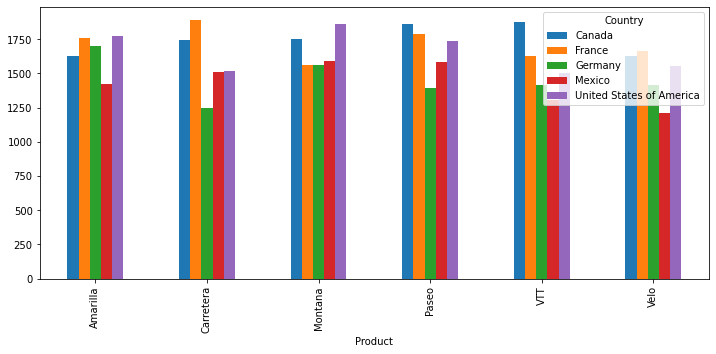

In [ ]:
df.pivot_table(index='Product', columns='Country',values='Units Sold', 
               aggfunc='mean').plot(kind='bar', figsize = [12,5])

Here is a complimentary python project that you can build yourself. This project will automate the aggregation of data into a a multiple sheet excel report using pandas and xlsxwriter.

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 30.2MB/s 


/usr/local/lib/python3.7/dist-packages/xlsxwriter/workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


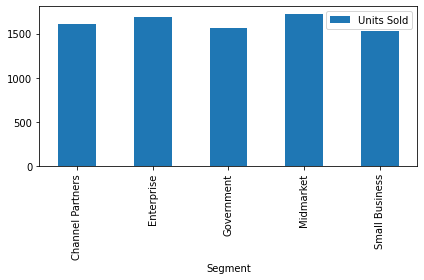

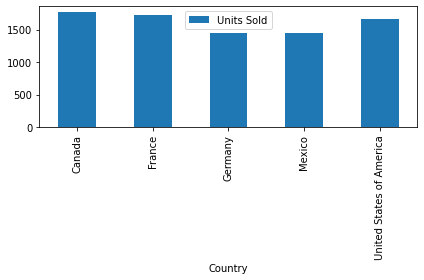

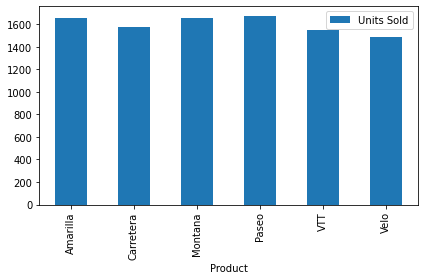

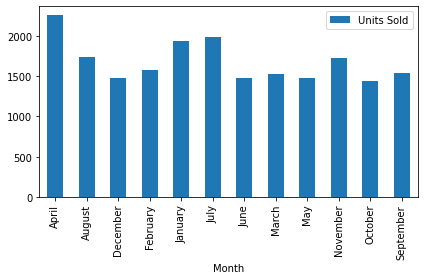

In [ ]:
#importing pandas as the alias pd
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
%matplotlib inline

#creating the dataframe "df" object from the csv file
df = pd.read_excel('Financial Sample.xlsx',index_col=0)

#adding calculated columns
df['COGS'] = df.apply(lambda x: x['Units Sold'] * x['Manufacturing Price'],axis=1)
df['Gross Profit'] = df.apply(lambda x: x['Units Sold'] * x['Sale Price'], axis=1)
df['Net Income'] = df.apply(lambda x: x['Gross Profit'] - x['COGS'], axis=1)
df['Month'] = df['Date'].apply(lambda x: dt.datetime.strftime(x, '%B'))
df['Years Since Sale'] = df['Date'].apply(lambda x: relativedelta(dt.datetime.today(), x).years)


xlwriter = pd.ExcelWriter('Sales Report.xlsx', engine='xlsxwriter')

agg_list = ['Segment', 'Country', 'Product', 'Month']

for col in agg_list:
  temp_pivot = df.pivot_table(index=col, values='Units Sold')
  pivot_chart = temp_pivot.plot(kind="bar")
  temp_pivot.to_excel(xlwriter, sheet_name='{}'.format(col))
  plt.tight_layout()
  plt.savefig('{}.png'.format(col))
  worksheet=xlwriter.sheets['{}'.format(col)]
  worksheet.insert_image('C1','{}.png'.format(col))

xlwriter.save()

xlwriter.close()